In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

In [2]:
img_path = '../assets/mask.png'
img_data = cv2.imread(img_path)
img_data = img_data > 128

(1616, 3024, 3)


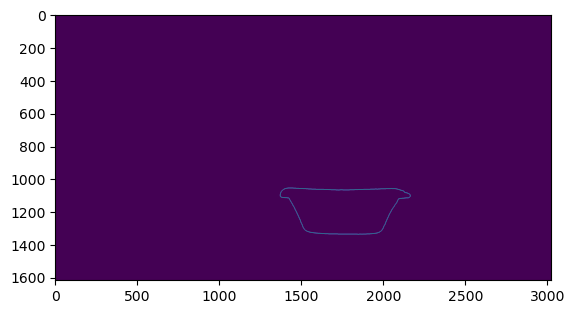

In [3]:
# Extract edges (optimisation for raycasting pass)
print(img_data.shape)

img_data = np.asarray(img_data[:, :, 0], dtype=np.double)
gx, gy = np.gradient(img_data)
temp_edge = gy * gy + gx * gx
temp_edge[temp_edge != 0.0] = 255.0
temp_edge = np.asarray(temp_edge, dtype=np.uint8)
# cv2.imwrite('../assets/mask_edge.png', temp_edge)

# DEBUG
img_path = '../assets/mask_edge.png'
img_data = cv2.imread(img_path)
img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
plt.imshow(img_data)


In [4]:
# Transform mask edge to pixel coordinates
img_path = '../assets/mask_edge.png'
img_data = cv2.imread(img_path)
img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
img = img_data.astype(np.uint8)
coord = cv2.findNonZero(img)
coord = np.squeeze(coord)
coord

array([[1420, 1056],
       [1421, 1056],
       [1422, 1056],
       ...,
       [1870, 1338],
       [1871, 1338],
       [1872, 1338]], dtype=int32)